In [1]:
import pandas as pd
import numpy
import matplotlib as plt
from matplotlib import font_manager,rc
import matplotlib.pyplot as plt	
import seaborn as sns
import folium
import re

# 명사추출
from konlpy.tag import Twitter
from konlpy.tag import Kkma

# 워드클라우드
from wordcloud import WordCloud

In [30]:
df =pd.read_csv('./blog_부산여행.csv',encoding='utf-8',sep='\t')

In [31]:
df

,[ 부산여행 ] 롯데월드 부산 내돈내산 후기
0,"안녕하세요, 여행블로거 내세상입니다. 사실 개인적으로 부산여행 중에 롯데월드를 ..."
1,[주간 일상] 남자친구랑 1박 2일 부산 여행
2,사실상 1박 2일 부산 여행 이라고 해놓고 홍시 투어라고 부릅니다. https:/...
3,아이와 함께 1박2일 부산여행 - 부산 시청역 근처 부산 시티호텔
4,"하고, 여행을 가도 주로 숙소에 머무는 시간이 길었거든요. 그래서 이번 부산여행 ..."
...,...
1994,야놀자가 부산 여행 프로젝트를 통해 지역경제 활성화에 기여합니다 야놀자가 부산...
1995,"부산 다이아몬드타워 전망대, 부산여행 인기 명소"
1996,가득한 부산여행 은 이미 많은 여행자들의 사랑을 받고 있습니다. 볼거리 먹거리로 ...
1997,부산여행 3일차 F1963(복합문화공간) 테라로사


In [37]:
df = df.rename(columns={'[ 부산여행 ] 롯데월드 부산 내돈내산 후기':'contents'})
df

,contents
0,"안녕하세요, 여행블로거 내세상입니다. 사실 개인적으로 부산여행 중에 롯데월드를 ..."
1,[주간 일상] 남자친구랑 1박 2일 부산 여행
2,사실상 1박 2일 부산 여행 이라고 해놓고 홍시 투어라고 부릅니다. https:/...
3,아이와 함께 1박2일 부산여행 - 부산 시청역 근처 부산 시티호텔
4,"하고, 여행을 가도 주로 숙소에 머무는 시간이 길었거든요. 그래서 이번 부산여행 ..."
...,...
1994,야놀자가 부산 여행 프로젝트를 통해 지역경제 활성화에 기여합니다 야놀자가 부산...
1995,"부산 다이아몬드타워 전망대, 부산여행 인기 명소"
1996,가득한 부산여행 은 이미 많은 여행자들의 사랑을 받고 있습니다. 볼거리 먹거리로 ...
1997,부산여행 3일차 F1963(복합문화공간) 테라로사


In [38]:
df

,contents
0,"안녕하세요, 여행블로거 내세상입니다. 사실 개인적으로 부산여행 중에 롯데월드를 ..."
1,[주간 일상] 남자친구랑 1박 2일 부산 여행
2,사실상 1박 2일 부산 여행 이라고 해놓고 홍시 투어라고 부릅니다. https:/...
3,아이와 함께 1박2일 부산여행 - 부산 시청역 근처 부산 시티호텔
4,"하고, 여행을 가도 주로 숙소에 머무는 시간이 길었거든요. 그래서 이번 부산여행 ..."
...,...
1994,야놀자가 부산 여행 프로젝트를 통해 지역경제 활성화에 기여합니다 야놀자가 부산...
1995,"부산 다이아몬드타워 전망대, 부산여행 인기 명소"
1996,가득한 부산여행 은 이미 많은 여행자들의 사랑을 받고 있습니다. 볼거리 먹거리로 ...
1997,부산여행 3일차 F1963(복합문화공간) 테라로사


In [39]:
df['contents'].str[0:]

0       안녕하세요, 여행블로거 내세상입니다. 사실 개인적으로  부산여행  중에 롯데월드를 ...
1                             [주간 일상] 남자친구랑 1박 2일  부산 여행 
2       사실상 1박 2일  부산 여행 이라고 해놓고 홍시 투어라고 부릅니다. https:/...
3                  아이와 함께 1박2일  부산여행  - 부산 시청역 근처 부산 시티호텔
4       하고, 여행을 가도 주로 숙소에 머무는 시간이 길었거든요. 그래서 이번  부산여행 ...
                              ...                        
1994    야놀자가  부산 여행  프로젝트를 통해 지역경제 활성화에 기여합니다 야놀자가  부산...
1995                         부산 다이아몬드타워 전망대,  부산여행  인기 명소
1996    가득한  부산여행 은 이미 많은 여행자들의 사랑을 받고 있습니다. 볼거리 먹거리로 ...
1997                         부산여행 3일차  F1963(복합문화공간) 테라로사
1998    &lt; 부산여행  3일차&gt; 2022년 10월 10일 월요일 ♣ 부산 엑스더 ...
Name: contents, Length: 1999, dtype: object

In [40]:
df['contents']= df['contents'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)
df['contents']=df["contents"].map(lambda x : (re.sub(' +', ' ', x)))

In [41]:
df

,contents
0,안녕하세요 여행블로거 내세상입니다 사실 개인적으로 부산여행 중에 롯데월드를 가라고 ...
1,주간 일상 남자친구랑 1박 2일 부산 여행
2,사실상 1박 2일 부산 여행 이라고 해놓고 홍시 투어라고 부릅니다 https you...
3,아이와 함께 1박2일 부산여행 부산 시청역 근처 부산 시티호텔
4,하고 여행을 가도 주로 숙소에 머무는 시간이 길었거든요 그래서 이번 부산여행 도 사...
...,...
1994,야놀자가 부산 여행 프로젝트를 통해 지역경제 활성화에 기여합니다 야놀자가 부산 여행...
1995,부산 다이아몬드타워 전망대 부산여행 인기 명소
1996,가득한 부산여행 은 이미 많은 여행자들의 사랑을 받고 있습니다 볼거리 먹거리로 넘쳐...
1997,부산여행 3일차 F1963 복합문화공간 테라로사


In [43]:
df['contents'].to_csv('./네이버블로그_split.csv',encoding='utf-8',index=False)

In [44]:
df['contents'].str.split(' ',expand=True)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,안녕하세요,여행블로거,내세상입니다,사실,개인적으로,부산여행,중에,롯데월드를,가라고,별로,...,None,None,None,None,None,None,None,None,None,None
1,,주간,일상,남자친구랑,1박,2일,부산,여행,,None,...,None,None,None,None,None,None,None,None,None,None
2,사실상,1박,2일,부산,여행,이라고,해놓고,홍시,투어라고,부릅니다,...,그냥,바로,따라,했습니다,가구거리에,,None,None,None,None
3,아이와,함께,1박2일,부산여행,부산,시청역,근처,부산,시티호텔,None,...,None,None,None,None,None,None,None,None,None,None
4,하고,여행을,가도,주로,숙소에,머무는,시간이,길었거든요,그래서,이번,...,ㅋㅋㅋㅋ,화장실도,변기와,,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,야놀자가,부산,여행,프로젝트를,통해,지역경제,활성화에,기여합니다,야놀자가,부산,...,정보를,원스톱으로,,None,None,None,None,None,None,None
1995,부산,다이아몬드타워,전망대,부산여행,인기,명소,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1996,가득한,부산여행,은,이미,많은,여행자들의,사랑을,받고,있습니다,볼거리,...,있습니다,타워,,None,None,None,None,None,None,None
1997,,부산여행,3일차,F1963,복합문화공간,테라로사,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [45]:
# 파일로드
data = pd.read_csv('./네이버블로그_split.csv',encoding='utf-8')
data = data['contents']

In [46]:
data

0       안녕하세요 여행블로거 내세상입니다 사실 개인적으로 부산여행 중에 롯데월드를 가라고 ...
1                                주간 일상 남자친구랑 1박 2일 부산 여행 
2       사실상 1박 2일 부산 여행 이라고 해놓고 홍시 투어라고 부릅니다 https you...
3                      아이와 함께 1박2일 부산여행 부산 시청역 근처 부산 시티호텔
4       하고 여행을 가도 주로 숙소에 머무는 시간이 길었거든요 그래서 이번 부산여행 도 사...
                              ...                        
1994    야놀자가 부산 여행 프로젝트를 통해 지역경제 활성화에 기여합니다 야놀자가 부산 여행...
1995                            부산 다이아몬드타워 전망대 부산여행 인기 명소
1996    가득한 부산여행 은 이미 많은 여행자들의 사랑을 받고 있습니다 볼거리 먹거리로 넘쳐...
1997                           부산여행 3일차 F1963 복합문화공간 테라로사
1998     lt 부산여행 3일차 gt 2022년 10월 10일 월요일 부산 엑스더 스카이 부...
Name: contents, Length: 1999, dtype: object

In [47]:
# 데이터가져오기
f = open("./네이버블로그_split.csv",'rt',encoding='utf-8')
lines = f.readlines() # 한 줄을가져와서 문자열 변환
line = []
for i in range(len(lines)):
    line.append(lines[i])
f.close()

# print(line)

In [48]:
compile = re.compile("[^ ㄱ-ㅣ가-힣]+")
for i in range(len(line)):

    a = compile.sub("",line[i])
    line[i] = a
# print(line)

In [49]:
# 문장분석 okt 사용
from konlpy.tag import Okt
okt = Okt()
result =[]
result = [okt.nouns(i) for i in line] #명사만 추출
# final_result= [r for i in result for r in i]
final_result=[r for i in result for r in i if len(r)>1] # 한개는 제거
# print(final_result)

In [56]:
#많이 나온 단어 상위백개
korean = pd.Series(final_result).value_counts(ascending=False).head(100)
print('키워드')
print(korean)
print(korean)

키워드
부산      2639
부산여행    1689
여행      1270
일차       360
맛집       340
        ... 
계속        40
블로거       40
출장        40
영도다리      40
횟집        40
Length: 100, dtype: int64
부산      2639
부산여행    1689
여행      1270
일차       360
맛집       340
        ... 
계속        40
블로거       40
출장        40
영도다리      40
횟집        40
Length: 100, dtype: int64


In [57]:
count_data = korean.to_dict()

In [58]:
from collections import Counter


count = Counter(count_data)

In [59]:
count

Counter({'부산': 2639,
         '부산여행': 1689,
         '여행': 1270,
         '일차': 360,
         '맛집': 340,
         '코스': 320,
         '해운대': 280,
         '추천': 250,
         '문화': 210,
         '기장': 200,
         '이번': 190,
         '카페': 180,
         '광안': 180,
         '박일': 180,
         '호텔': 140,
         '스카이': 140,
         '마을': 130,
         '투어': 130,
         '공원': 120,
         '밀면': 120,
         '거리': 110,
         '송도': 110,
         '시간': 110,
         '요트': 110,
         '타고': 110,
         '영도': 100,
         '엑스': 100,
         '친구': 90,
         '파크': 90,
         '국제': 90,
         '시작': 90,
         '위치': 80,
         '흰여울': 80,
         '사진': 80,
         '숙소': 80,
         '다음': 80,
         '서면': 80,
         '곱창': 70,
         '날씨': 70,
         '여름': 70,
         '월요일': 70,
         '다시': 70,
         '야경': 70,
         '치킨': 70,
         '원장': 70,
         '바다': 70,
         '아이': 70,
         '장안사': 60,
         '해동용궁사': 60,
         '헤나': 60,
         '

In [60]:
font_path='C:/Users/admin/Downloads/nanum-all/나눔 글꼴/NanumBarunGothic.ttf'

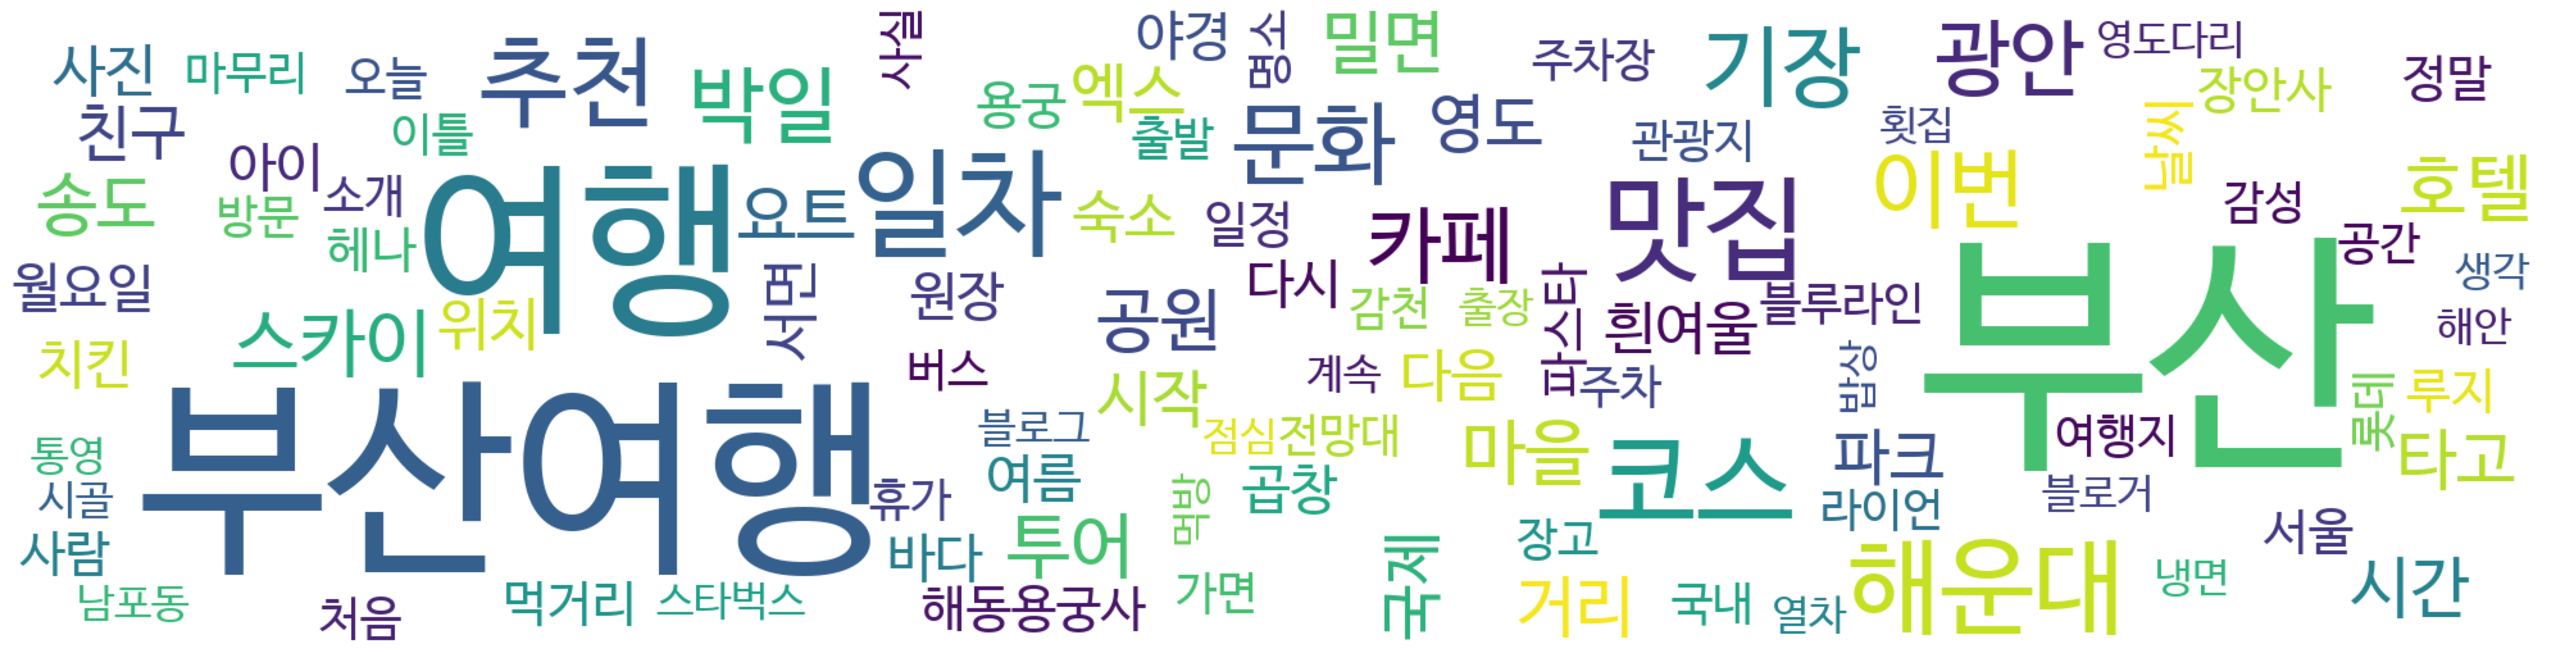

In [61]:
#wordcloud 만들기
wc = WordCloud(max_font_size=200,
	font_path = font_path,
	background_color="white",
    width=2000, height=500).generate_from_frequencies(dict(count))
    # font 경로 개별적으로 설정해야함

plt.figure(figsize = (40,40))
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()